In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
project_path = os.getcwd() + '/../'
sys.path.append(project_path + "utils")

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.grid_search import GridSearchCV
from sklearn.externals import joblib
import sklearn

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
import function
import preprocessing
import local_bayes
import visualize

In [4]:
sys.path.append(project_path + "models/cnn")

In [5]:
p = preprocessing.Preprocessing(data_dir = "../original_data/bookmark/")

# data load

In [7]:
data_name = 'Memetracker'
data_dir = "../original_data/%s/" % data_name
data = open(data_dir + 'MemePhr.txt')

In [8]:
data_dir = "../original_data/%s/" % data_name
data = open(data_dir + 'MemePhr.txt')

desc_dict_ls, ts_ls = [], []
key_ls = ['ID', 'Content', 'BeginTm', 'NumQr', 'PeakTm']
for i, line in enumerate(data):      
    if i % 2 == 0:
        desc_dict = {}
        for key, ele in zip(key_ls, line.rstrip().split("\t")):
            desc_dict.update({'%s' % key:ele})
        desc_dict_ls.append(desc_dict)
    else:
        ts = line.rstrip().split("\t")
        int_ts = []
        for ele in ts:
            int_ts.append(float(ele))
        ts_ls.append(int_ts)

In [9]:
len(ts_ls[39])

128

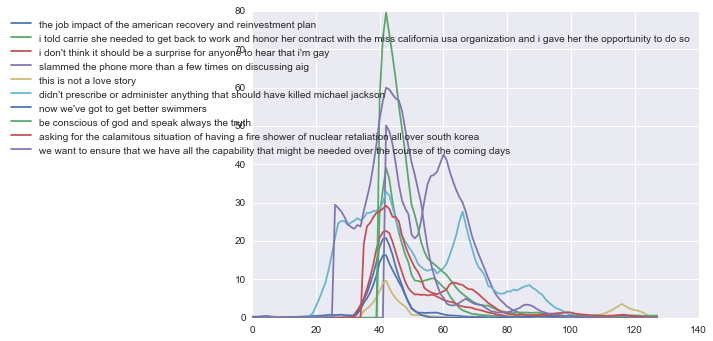

In [10]:
for i in xrange(100, 110):
    plt.plot(ts_ls[i], label=desc_dict_ls[i]['Content'])
    plt.legend()

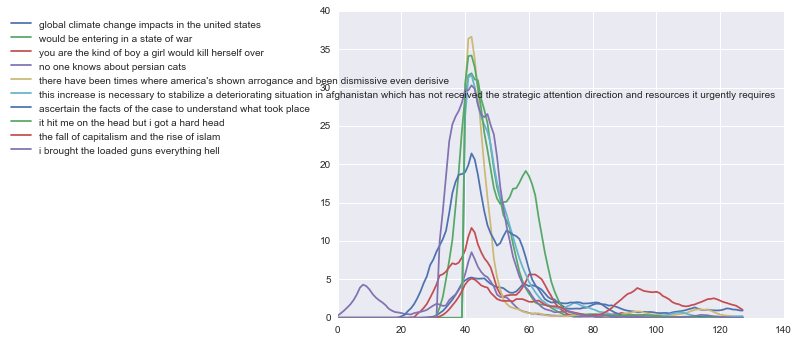

In [11]:
for i in xrange(590, 600):
    plt.plot(ts_ls[i], label=desc_dict_ls[i]['Content'])
    plt.legend()

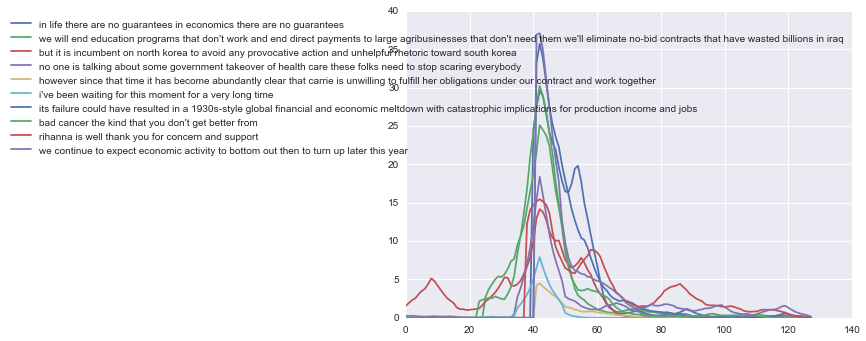

In [12]:
for i in xrange(810, 820):
    plt.plot(ts_ls[i], label=desc_dict_ls[i]['Content'])
    plt.legend()

In [13]:
category_input_ts, category_label, category_input_sum = p.make_supervised_data(ts_ls, stride=5)
x, label = p.balancing_sampling(category_input_ts, category_label)
save_data_dir = '../data/%s/' % data_name
os.mkdir(save_data_dir)
p.make_test_dataset(x, label, save_data_dir)

8533 data created

# model training

In [14]:
import cnn

In [15]:
epoch_num = 200
save_data_dir = '../data/%s/' % data_name
save_model_dir = "../models/cnn/results/%s_%s/" % (data_name, epoch_num)
os.mkdir("../models/cnn/results/%s_%s" % (data_name, epoch_num))
train_0_0 = numpy.load(save_data_dir + '0_test/0_fold/0_train.npz')
test_0_0 = numpy.load(save_data_dir + '0_test/0_fold/0_test.npz')
cnntrain = cnn.CNN(save_model_dir=save_model_dir, epoch_num=epoch_num)

In [16]:
train_0_0['x'].shape

(6827, 30)

In [17]:
cnntrain.train(train_0_0, test_0_0)

epoch 1
graph generated
train mean loss=0.473607772239, accuracy=0.853522771577, throughput=945.662545476 images/sec
test  mean loss=0.313194816515, accuracy=0.870457203489
epoch 2
train mean loss=0.318579236993, accuracy=0.882232309208, throughput=747.103042302 images/sec
test  mean loss=0.268180541126, accuracy=0.903868695426
epoch 3
train mean loss=0.281584570684, accuracy=0.892778668647, throughput=846.343057769 images/sec
test  mean loss=0.256780179311, accuracy=0.905041027251
epoch 4
train mean loss=0.263882627564, accuracy=0.89600116802, throughput=755.520044563 images/sec
test  mean loss=0.243176722146, accuracy=0.908558022724
epoch 5
train mean loss=0.245347268503, accuracy=0.898344800817, throughput=526.063328886 images/sec
test  mean loss=0.260147893258, accuracy=0.902110199436
epoch 6
train mean loss=0.243896963628, accuracy=0.903764462155, throughput=851.042209558 images/sec
test  mean loss=0.238189175463, accuracy=0.914419694075
epoch 7
train mean loss=0.233893139262, acc